# Prophet: Forecasting at Scale

In [1]:

import pandas as pd
!pip install pystan==2.19.1.1 prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 146 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv")

In [3]:
data = data.rename(columns = {"Month": "ds", 'Monthly milk production (pounds per cow)': "y"})

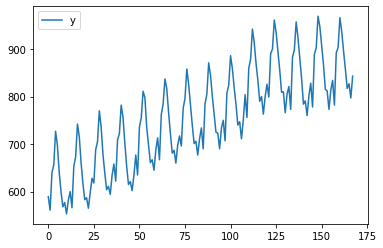

In [4]:
data.plot()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/mab33skz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/bdsx5t3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78029', 'data', 'file=/tmp/tmpqc9ywom_/mab33skz.json', 'init=/tmp/tmpqc9ywom_/bdsx5t3y.json', 'output', 'file=/tmp/tmp6e5j76r8/prophet_model-20220924184003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


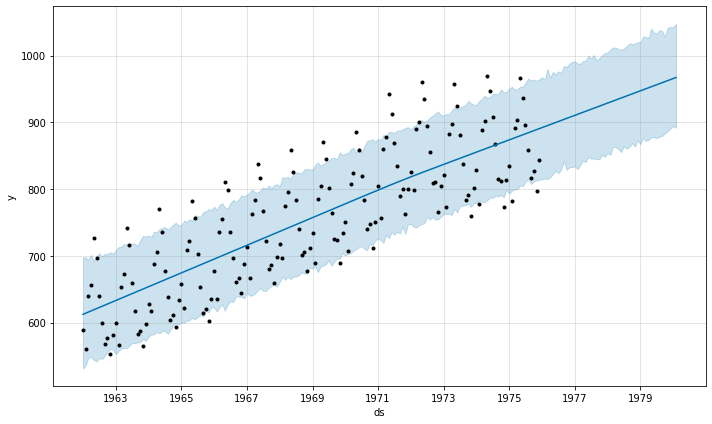

In [5]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/pcn60cc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/b_rla24q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84265', 'data', 'file=/tmp/tmpqc9ywom_/pcn60cc3.json', 'init=/tmp/tmpqc9ywom_/b_rla24q.json', 'output', 'file=/tmp/tmplxmflln8/prophet_model-20220924184005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


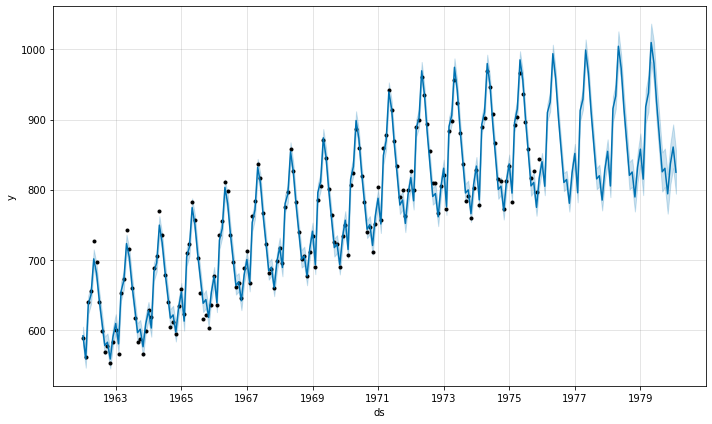

In [6]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=True,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [7]:
model.params

OrderedDict([('lp__', array([[664.077]])),
             ('k', array([[0.282802]])),
             ('m', array([[0.627587]])),
             ('delta',
              array([[ 1.39782e-10,  2.63359e-08,  1.66355e-07,  3.98148e-02,
                       8.30694e-08,  5.74938e-06,  2.58351e-05,  6.51183e-02,
                       4.95727e-08, -4.01137e-09, -3.70624e-02, -9.64651e-02,
                      -2.20580e-08,  3.94482e-10,  1.11940e-08,  1.20194e-07,
                       1.40416e-02,  1.64628e-01,  1.01326e-01,  2.41055e-09,
                      -8.41005e-07, -2.70433e-01, -1.90890e-01, -8.94801e-10,
                       4.74127e-03]])),
             ('sigma_obs', array([[0.0103788]])),
             ('beta',
              array([[ 0.0865981 , -0.0503189 , -0.0377658 ,  0.00895134,  0.0005721 ,
                       0.0361931 ,  0.00574508,  0.0208499 ,  0.00603761,  0.0198708 ,
                       0.0362068 ,  0.00723005,  0.0311314 , -0.0104295 ,  0.0175814 ,
           

# Explorando features do Prophet

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

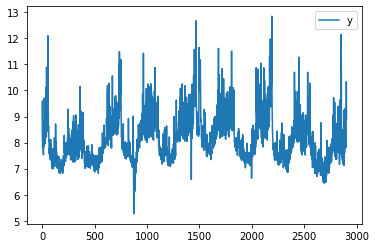

In [9]:
df.plot()

In [10]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/fkc1zihe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/1cs7tzgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3566', 'data', 'file=/tmp/tmpqc9ywom_/fkc1zihe.json', 'init=/tmp/tmpqc9ywom_/1cs7tzgm.json', 'output', 'file=/tmp/tmpf6acg5nx/prophet_model-20220924184006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=1000)

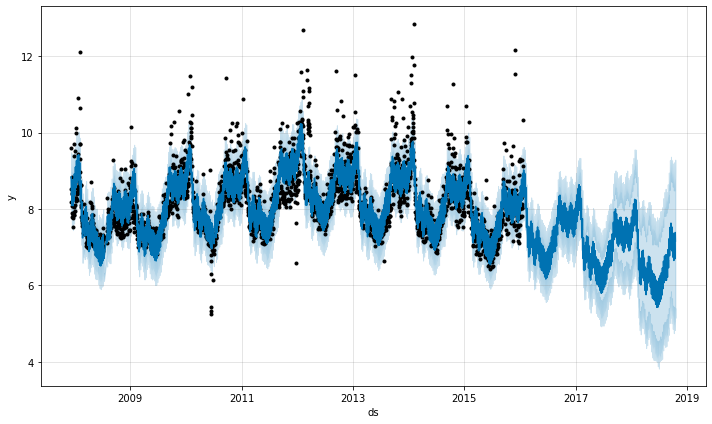

In [12]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

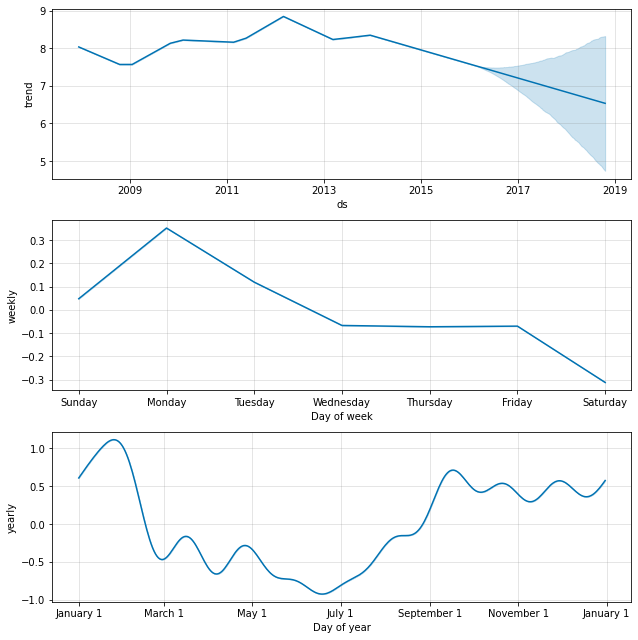

In [13]:
fig2 = model.plot_components(forecast)

# crescimento exponencial

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/1z3q6qu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/14gs6g42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50042', 'data', 'file=/tmp/tmpqc9ywom_/1z3q6qu8.json', 'init=/tmp/tmpqc9ywom_/14gs6g42.json', 'output', 'file=/tmp/tmph137v3sa/prophet_model-20220924184013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


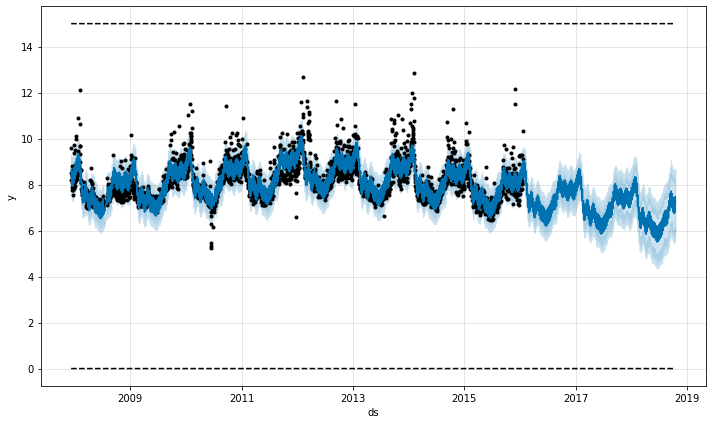

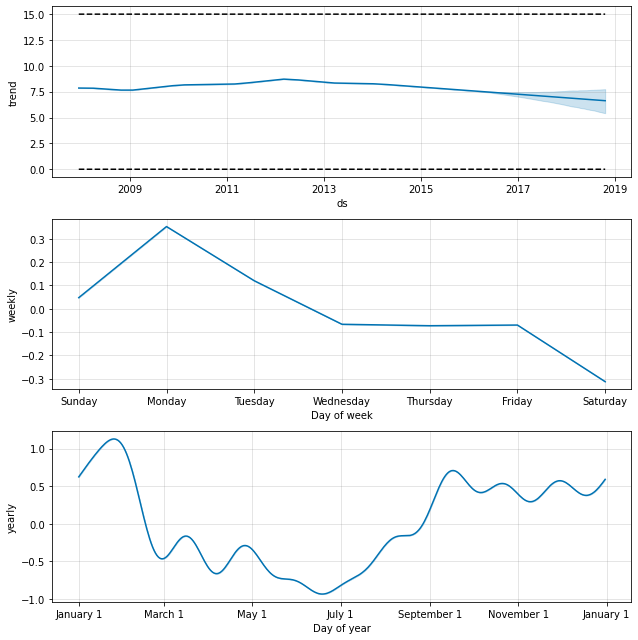

In [14]:
model = Prophet(growth='logistic',changepoint_prior_scale = 0.1, seasonality_prior_scale = 1.0)
df['cap'] = 15
df['floor'] = 0

model.fit(df)
future = model.make_future_dataframe(periods=1000)
future['cap'] = 15
future['floor'] = 0
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

### Esse crossvalidation evita overfitting, prevendo sempre uma parte dos valores fora da curva

In [15]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days', parallel="processes")

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81dd358c10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/jwq121kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/hcf_y1m0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/pz59m_vn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/u5ty4o_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61474', 'data', 'file=/tmp/tmpqc9ywom_/jwq121kk.json', 'init=/tmp/tmpqc9ywom_/pz59m_vn.json', 'output', 'file=/tmp/tmpba4qah_g/prophet_model-20220924184024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/pyth

In [16]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.931749,8.424758,9.438129,8.242493,2010-02-15
1,2010-02-17,8.697677,8.186273,9.186495,8.008033,2010-02-15
2,2010-02-18,8.580645,8.069855,9.015792,8.045268,2010-02-15
3,2010-02-19,8.502078,7.998485,9.013828,7.928766,2010-02-15
4,2010-02-20,8.243225,7.709264,8.774509,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.627297,7.956798,9.315492,7.817223,2015-01-20
3984,2016-01-17,9.021822,8.326620,9.695275,9.273878,2015-01-20
3985,2016-01-18,9.328721,8.676404,10.065815,10.333775,2015-01-20
3986,2016-01-19,9.112479,8.428040,9.787906,9.125871,2015-01-20


O método performance_metrics pode ser usado para calcular algumas estatísticas úteis do desempenho da previsão (yhat, yhat_lower e yhat_upper em comparação com y), como uma função da distância do corte (quão longe no futuro estava a previsão). As estatísticas calculadas são erro quadrático médio (MSE), raiz do erro quadrático médio (RMSE), erro absoluto médio (MAE), erro percentual absoluto médio (MAPE), erro percentual absoluto mediano (MDAPE) e cobertura das estimativas yhat_lower e yhat_upper. Eles são calculados em uma janela contínua das previsões em df_cv após a classificação por horizonte (ds menos corte).

In [17]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.488594,0.698995,0.497137,0.057449,0.049355,0.057792,0.689356
1,38 days,0.493915,0.702791,0.501730,0.057980,0.048968,0.058385,0.685473
2,39 days,0.515663,0.718097,0.507603,0.058555,0.048968,0.059085,0.682732
3,40 days,0.522923,0.723134,0.510141,0.058820,0.048162,0.059420,0.688899
4,41 days,0.530451,0.728321,0.510917,0.058869,0.048477,0.059533,0.695295


# hyperparameter tunning

In [18]:
import datetime

In [19]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

# Generate all combinations of parameters

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
mapes = [] # Store the MAPEs for each params here
# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days',  parallel="processes")
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/mgrezj28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/gy_yfp9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70353', 'data', 'file=/tmp/tmpqc9ywom_/mgrezj28.json', 'init=/tmp/tmpqc9ywom_/gy_yfp9q.json', 'output', 'file=/tmp/tmp0hlzbfw0/prophet_model-20220924184058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f81db82e3d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/82e

    changepoint_prior_scale  seasonality_prior_scale      rmse      mape
0                     0.001                     0.01  0.847376  0.104290
1                     0.001                     0.10  0.846507  0.104083
2                     0.001                     1.00  0.844351  0.103766
3                     0.001                    10.00  0.851325  0.104714
4                     0.010                     0.01  0.576750  0.062753
5                     0.010                     0.10  0.576064  0.062599
6                     0.010                     1.00  0.559733  0.060944
7                     0.010                    10.00  0.550308  0.059982
8                     0.100                     0.01  0.509410  0.053042
9                     0.100                     0.10  0.510402  0.052538
10                    0.100                     1.00  0.511563  0.052547
11                    0.100                    10.00  0.503417  0.052072
12                    0.500                     0.0

In [20]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/bl_elpxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc9ywom_/0khexbip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65834', 'data', 'file=/tmp/tmpqc9ywom_/bl_elpxc.json', 'init=/tmp/tmpqc9ywom_/0khexbip.json', 'output', 'file=/tmp/tmpy_a_04a4/prophet_model-20220924184213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


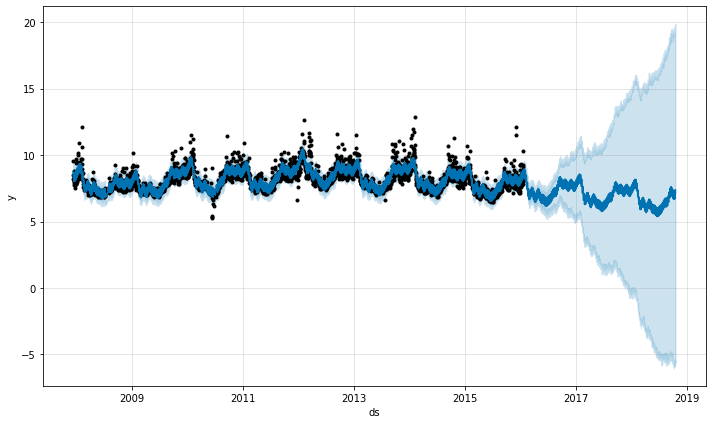

In [21]:
model = Prophet(**best_params)
model.fit(df)

future = model.make_future_dataframe(periods=1000)

forecast = model.predict(future)
fig1 = model.plot(forecast)